In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("./datasets/ch4emission.csv")

In [4]:
df.shape

(29, 24)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   year            29 non-null     int64
 1   agriculture     29 non-null     int64
 2   mining          29 non-null     int64
 3   manufacturing   29 non-null     int64
 4   electricity     29 non-null     int64
 5   watersupply     29 non-null     int64
 6   construction    29 non-null     int64
 7   wholesale       29 non-null     int64
 8   transport       29 non-null     int64
 9   foodservices    29 non-null     int64
 10  information     29 non-null     int64
 11  financial       29 non-null     int64
 12  realestate      29 non-null     int64
 13  professional    29 non-null     int64
 14  administrative  29 non-null     int64
 15  defence         29 non-null     int64
 16  eduction        29 non-null     int64
 17  heath           29 non-null     int64
 18  arts            29 non-null     

In [6]:
df.sample(5)

,year,agriculture,mining,manufacturing,electricity,watersupply,construction,wholesale,transport,foodservices,...,administrative,defence,eduction,heath,arts,other,activities,consumer,lulucf,ch4emission
12,2002,26693,8553,253,5783,58008,34,38,275,10,...,8,16,8,10,4,3,0,1483,32,101231
26,2016,25616,1720,228,3816,18129,26,19,113,8,...,3,5,5,10,1,1,0,1399,40,51152
23,2013,25021,2998,261,4291,21445,22,22,108,8,...,3,6,6,11,1,1,0,1386,30,55632
8,1998,29801,13430,363,6974,66318,43,53,294,11,...,13,19,12,14,5,4,0,1905,21,119312
22,2012,24992,4029,247,4460,24356,23,20,113,8,...,3,7,6,10,1,1,0,1305,67,59662


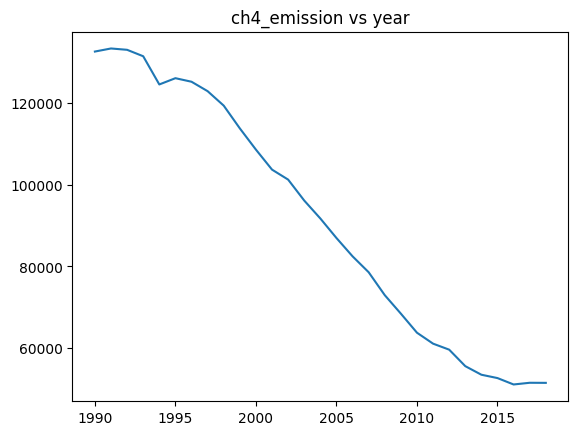

In [11]:
plt.title("ch4_emission vs year")
plt.plot(df['year'], df['ch4emission'])

In [112]:
from sklearn.model_selection import train_test_split, cross_val_score
X = df.iloc[:, 1:-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2)

In [22]:
from plotly import express as px

In [55]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
pca_df = pd.DataFrame(pca.fit_transform(X_train))
pca_df['target'] = y_train

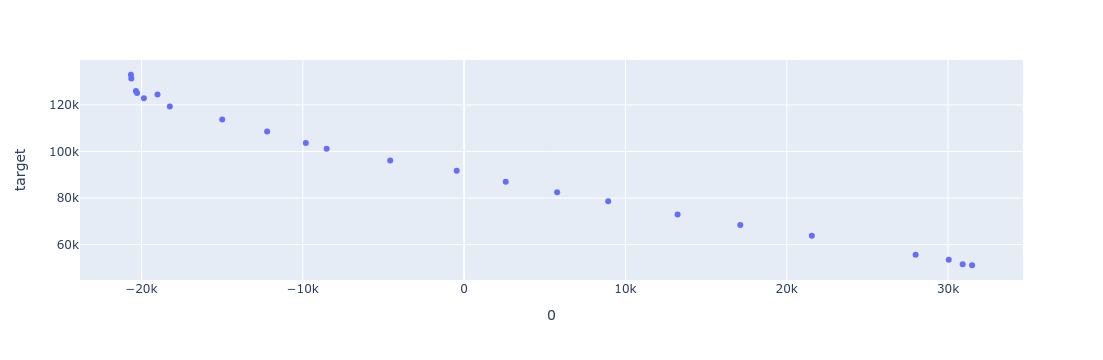

In [56]:
px.scatter(pca_df, x=0, y='target')

In [117]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [192]:
lr_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components=1)),
    ("poly", PolynomialFeatures(degree=2)),
    ("lr", LinearRegression())
])

In [193]:
lr_pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=1)),
                ('poly', PolynomialFeatures()), ('lr', LinearRegression())])

In [194]:
y_pred = lr_pipe.predict(X_train)
y_pred_ = lr_pipe.predict(X_test)

In [195]:
r2_score(y_train, y_pred)

0.9851050903538554

In [196]:
r2_score(y_test, y_pred_)

0.9812732996807492

In [197]:
def cross(i : int, model=lr_pipe):
    X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=i)
    model.fit(X_train, y_train)

    y_pred = lr_pipe.predict(X_train)
    y_pred_ = lr_pipe.predict(X_test)
    return{
        "train" : r2_score(y_train, y_pred),
        "test" : r2_score(y_test, y_pred_)
    } 

In [198]:
train = []
test = []

for i in range(1, 100):
    result = cross(i)
    train.append(result['train'])
    test.append(result['test'])

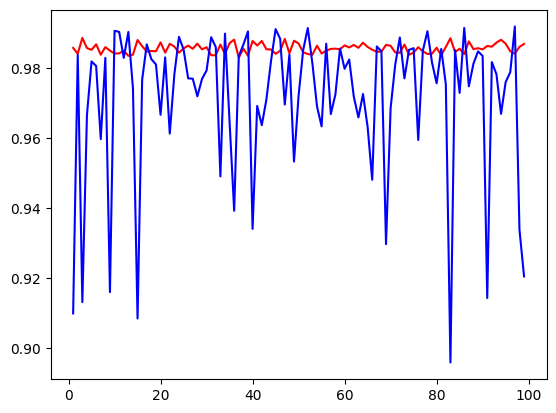

In [199]:
plt.plot(list(range(1, 100)), train, c='red')
plt.plot(list(range(1, 100)), test, c='blue')

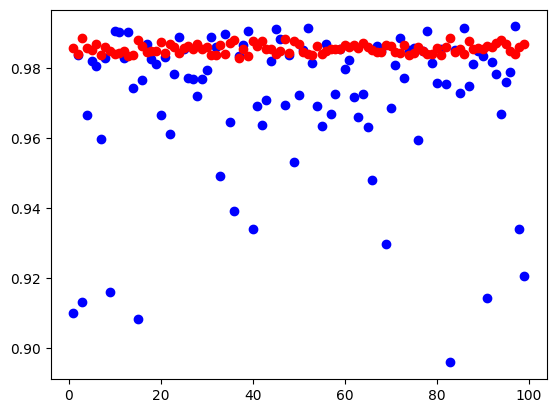

In [200]:
plt.scatter(list(range(1, 100)), test, c='blue')
plt.scatter(list(range(1, 100)), train, c='red')

In [201]:
train = []
test = []

for i in range(1, 100):
    result = cross(i, model=LinearRegression())
    train.append(result['train'])
    test.append(result['test'])

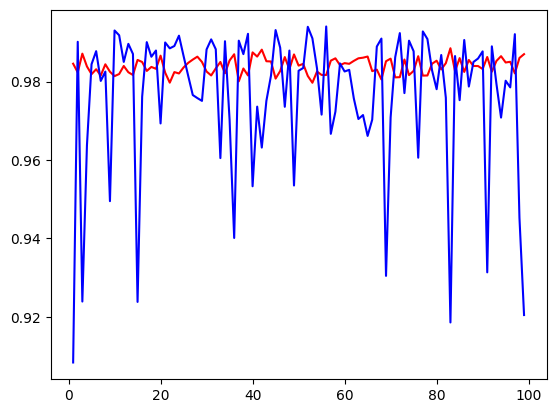

In [202]:
plt.plot(list(range(1, 100)), train, c='red')
plt.plot(list(range(1, 100)), test, c='blue')

In [203]:
lr = LinearRegression()
lr.fit(X_train, y_train)
np.mean(cross_val_score(lr, X, y, cv=10, scoring='r2'))

0.9658186281110211

In [205]:
df.head()

,year,agriculture,mining,manufacturing,electricity,watersupply,construction,wholesale,transport,foodservices,...,administrative,defence,eduction,heath,arts,other,activities,consumer,lulucf,ch4emission
0,1990,30330,24164,502,9869,64272,57,77,334,12,...,21,38,16,18,8,6,1,2751,17,132533
1,1991,29978,24663,495,9713,64900,56,77,334,13,...,21,38,16,19,8,6,1,2886,19,133284
2,1992,29965,24491,507,9589,65077,55,75,332,12,...,20,39,16,19,7,6,1,2691,15,132959
3,1993,29806,22791,490,9258,65635,53,72,329,12,...,19,38,14,18,8,6,1,2780,16,131385
4,1994,29903,15861,508,8982,66150,52,70,328,12,...,18,29,13,18,7,6,1,2479,15,124489
